In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics

In [3]:
ames = pd.read_csv('./datasets/train.csv')

In [4]:
ames.shape

(2051, 81)

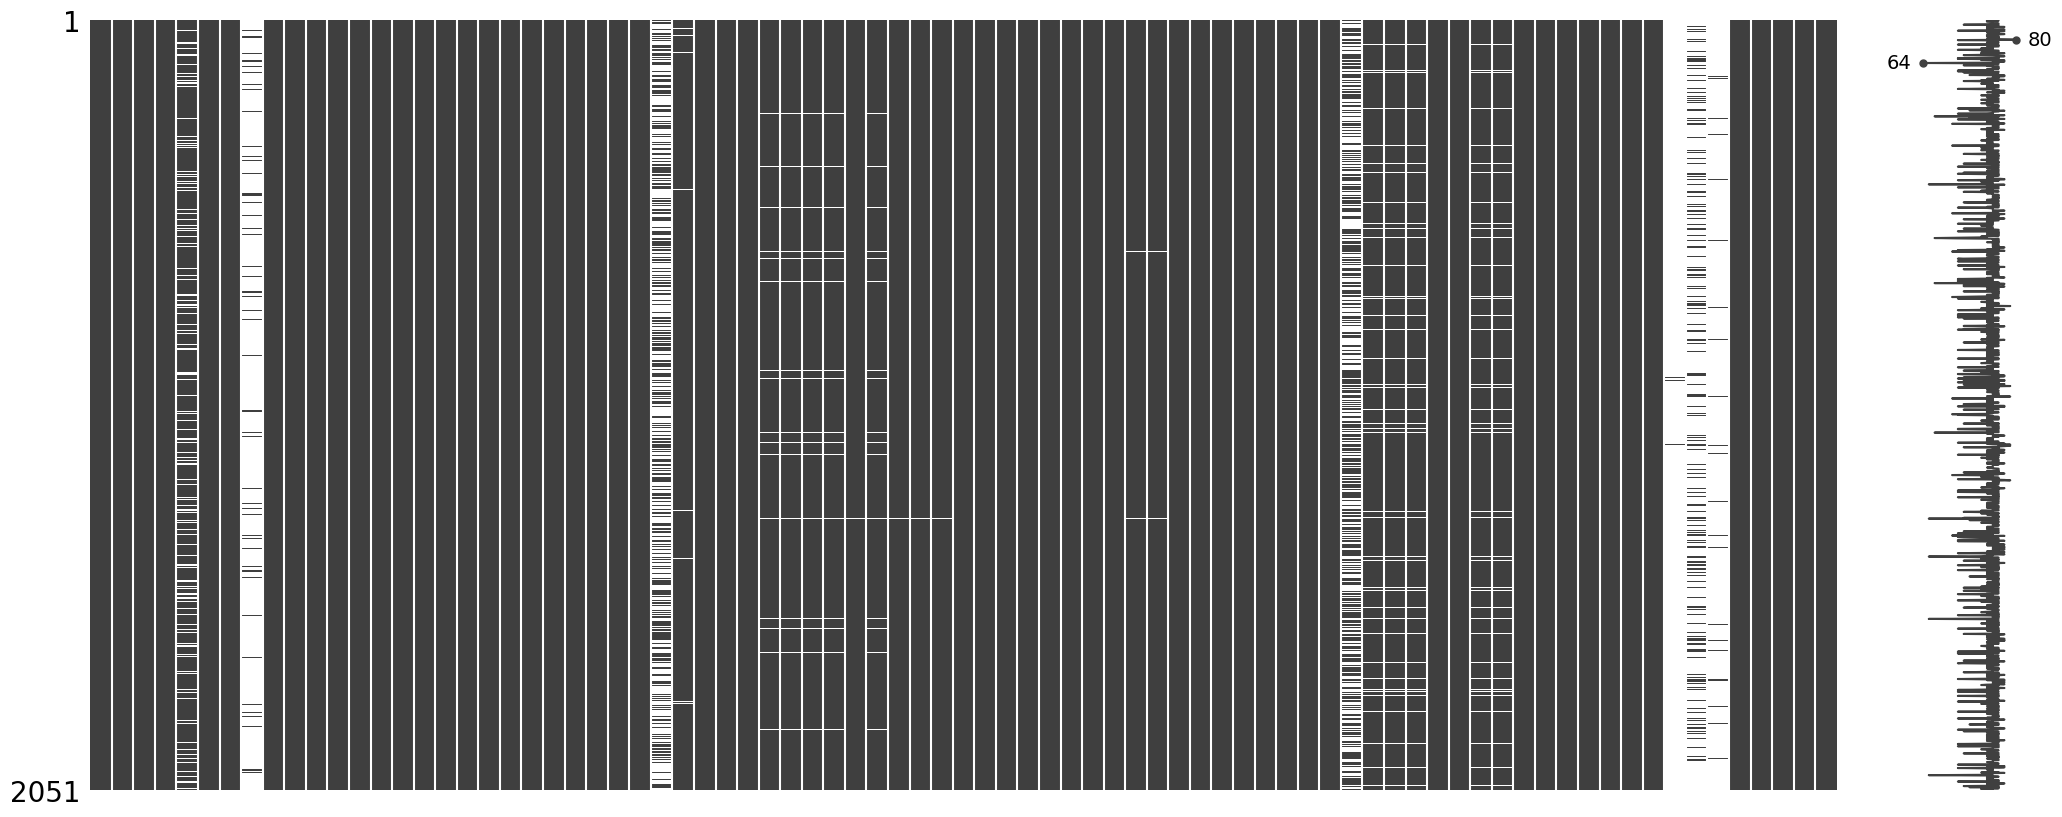

In [5]:
import missingno as msno
msno.matrix(ames);

## 1. Data Cleaning

In [6]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
# delete columns with less than 40% of data and one of the columns with duplicate values 
ames = ames.drop(columns = ['Garage Qual','Condition 1','Misc Feature', 'Fence','Pool QC', 'Fireplace Qu','Mas Vnr Type', 'Alley'])

In [8]:
# replace empty columns with NaN
ames = ames.replace(' ', np.nan)
ames = ames.replace('nan', np.nan)
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

In [9]:
ames = ames.replace(' ', np.nan)
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

In [10]:
# there is strong reletionship between year of house built and garage bult
cols = ['Year Built', 'Garage Yr Blt']
ames[cols].corr()

,Year Built,Garage Yr Blt
Year Built,1.000000,0.825316
Garage Yr Blt,0.825316,1.000000


In [11]:
# filled empty 'Garage Yr Blt' cells with Year Built values from the same series.

ames['Garage Yr Blt'] = ames['Garage Yr Blt'].fillna(ames['Year Built'])

In [12]:
cols = ['Year Built', 'Garage Yr Blt']
ames[cols].corr()

,Year Built,Garage Yr Blt
Year Built,1.00000,0.84661
Garage Yr Blt,0.84661,1.00000


In [13]:
# missing values in int and float columns  filled with their mean values
ames = ames.fillna(ames[['Garage Area', 'Garage Cars', 'Bsmt Half Bath', 
               'Bsmt Full Bath', 'Total Bsmt SF', 'Bsmt Unf SF', 
               'BsmtFin SF 2', 'BsmtFin SF 1', 'Mas Vnr Area', 'Lot Frontage']].mean())

In [14]:
# missing values in object columns filled with their mode value
for column in ['Garage Cond', 'Garage Finish', 'Garage Type', 'BsmtFin Type 2', 
                         'BsmtFin Type 1', 'Bsmt Exposure', 'Bsmt Cond', 'Bsmt Qual']: ames[column].fillna(ames[column].mode()[0], inplace=True)

In [15]:
ames.dropna(inplace = True)

In [16]:
ames.isna().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 73, dtype: int64

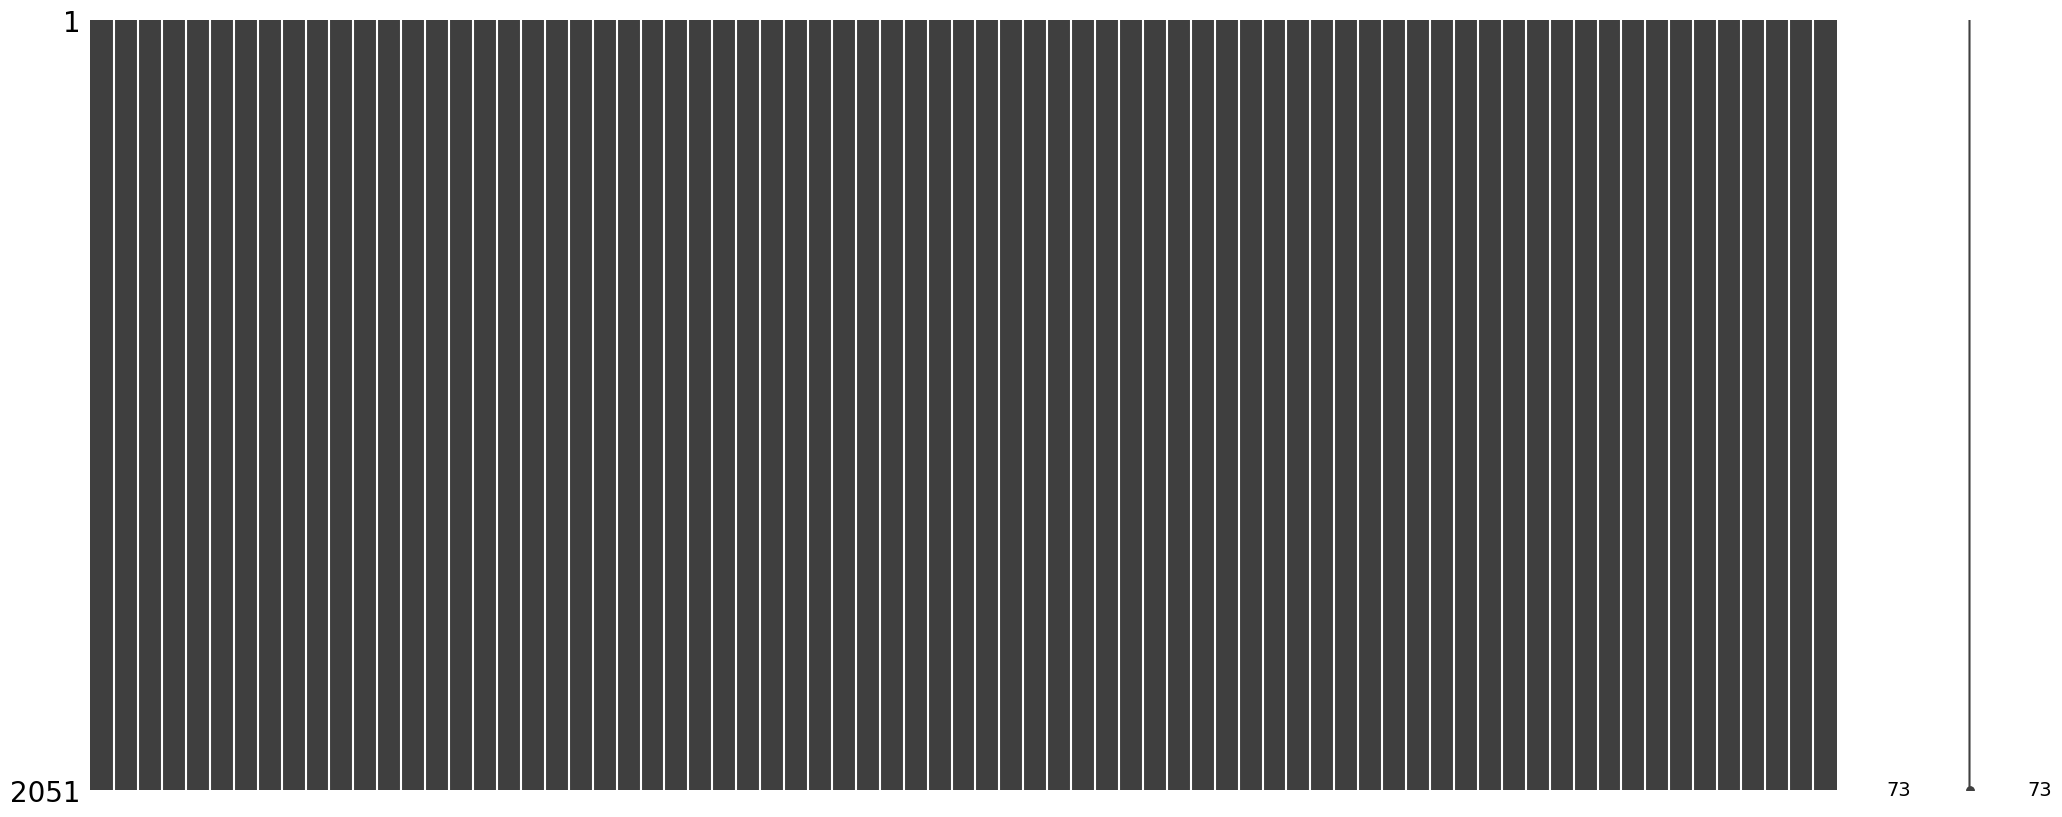

In [17]:
msno.matrix(ames);

In [18]:
ames['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [19]:
ames.to_csv('./datasets/clean_data_before_dropna.csv', index = False)

There are are outliers in 'Sale Price'.

# 2. Preprocessing

### Dummifying catagorical variables

In [20]:
# extract columns with catagorical_variables
dat_types = ames.dtypes
cat_cols = dat_types[dat_types == 'object'].index
cat_colsX = ames[cat_cols]
cat_colsX.shape

(2051, 34)

In [21]:
# apply OneHotEncoder to dummify catagorical variables
ohe = OneHotEncoder(drop='first', sparse = False).set_output(transform = 'pandas')
ohetransform = ohe.fit_transform(cat_colsX)

C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
ohetransform.shape

(2051, 181)

In [23]:
ohetransform.head()

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
ohetransform['Street_Pave'].dtype

dtype('float64')

In [25]:
num_cols = ames.select_dtypes(include = [np.number])
num_cols.shape

(2051, 39)

In [26]:
num_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [27]:
# concat catagorical and numerical columns 
ames_dums = pd.concat([num_cols, ohetransform], axis = 1)
ames_dums.shape

(2051, 220)

In [28]:
ames_dums.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
ames_dums = ames_dums.dropna(axis = 1)
ames_dums.shape

(2051, 220)

In [30]:
ames_dums = ames_dums.drop(columns = ['Bsmt Cond_Fa','Bsmt Cond_Po','Condition 2_Feedr', 'Condition 2_PosN', 'Condition 2_RRAe', 'Condition 2_RRNn',
                                      'Electrical_Mix','Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 
                                      'Exterior 1st_Stone','Exterior 2nd_Stone','Functional_Sal', 'Functional_Sev',
                                     'Condition 2_RRAn','Heating QC_Po','Heating_OthW', 'Heating_Wall', 'MS Zoning_C (all)',
                                     'Neighborhood_GrnHill','Neighborhood_Landmrk','Roof Matl_CompShg', 'Roof Matl_Membran', 'Utilities_NoSeWa'])

#### Apply standardScaler for regularization

In [31]:
ames_dums.to_csv('./datasets/ames_clean_data_before_dropna.csv', index = False)

In [32]:
X = ames_dums.drop(['SalePrice'], axis = 1)
y = ames_dums['SalePrice']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
# second split 80:20 for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                    test_size = 0.2, random_state = 42)

In [35]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [36]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (1640, 196)
y_train shape is: (1640,)
Z_test shape is: (411, 196)
y_test shape is: (411,)


### linear regression: Xtrain

In [37]:
lrsc = LinearRegression()

In [38]:
lrsc.fit(Z_train, y_train) # trainiing part

LinearRegression()

In [39]:
lrsc.score(Z_train, y_train) #plug test values here

0.9087308836737793

In [40]:
y_hat_train = lrsc.predict(Z_train) #plug test values here( inplace of X-train, it will be X_test)

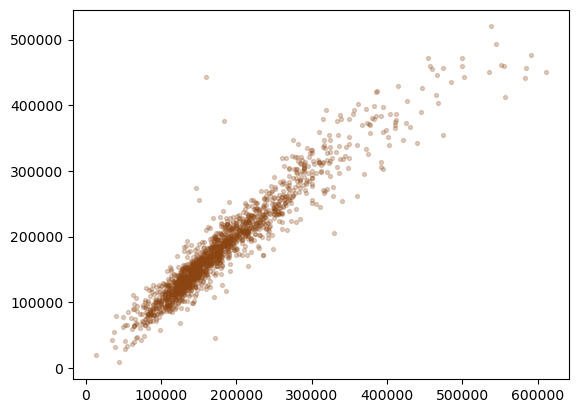

In [41]:
plt.scatter(y_train, y_hat_train, color = 'saddlebrown', s = 8, alpha =1/4);

In [42]:
sse = np.sum((y_train - y_hat_train)**2)
sse

952438620812.2412

In [43]:
mse = np.mean((y_train - y_hat_train)**2)
mse

580755256.5928301

In [44]:
metrics.mean_absolute_error(y_train, y_hat_train) # MAD

15530.67308880177

In [45]:
metrics.r2_score(y_train, y_hat_train)

0.9087308836737793

In [46]:
(cross_val_score(lrsc, X_train, y_train, cv = 5))

array([0.89584097, 0.85845655, 0.8755159 , 0.84085407, 0.69062493])

In [47]:
np.mean(cross_val_score(lrsc, X_train, y_train, cv = 5))

0.8322584847906107

In [48]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True, random_state = 2024)
np.mean(cross_val_score(lrsc, X_train, y_train, cv = kf))

0.8024164711128036

In [49]:
y_hat_test = lrsc.predict(Z_test)
y_hat_test.shape

(411,)

In [50]:
Z_test.shape

(411, 196)

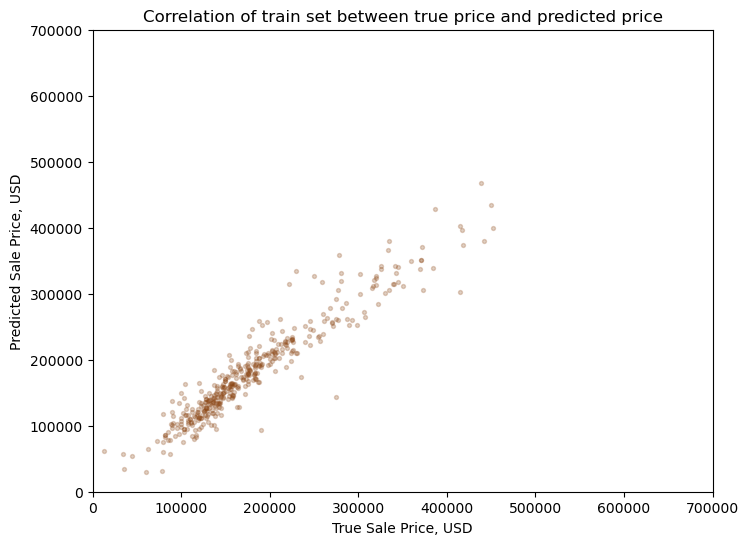

In [51]:
plt.figure(figsize=(8, 6))
tr_price = y_test
predicted_price = y_hat_test
plt.scatter(tr_price, predicted_price, color = 'saddlebrown', s = 8, alpha =1/4)
plt.xlabel('True Sale Price, USD')
plt.ylabel('Predicted Sale Price, USD')
plt.xlim(0, 700000)
plt.ylim(0, 700000)
plt.title('Correlation of train set between true price and predicted price');

In [52]:
lrsc.score(Z_test, y_test)

-1.3533675202416792e+16

In [53]:
mse = np.mean((y_test - y_hat_test)**2)
mse

8.041054090410122e+25

In [54]:
metrics.r2_score(y_test, y_hat_test)

-1.3533675202416792e+16

In [55]:
(cross_val_score(lrsc, Z_test, y_test, cv = 5))

array([-1.49988167e+23, -5.00705321e+21, -6.30694536e+22, -8.79714452e+22,
       -1.56281315e+23])

In [56]:
np.mean(cross_val_score(lrsc, Z_test, y_test, cv = 5))

-9.246348683917735e+22

In [57]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True, random_state = 2024)
np.mean(cross_val_score(lrsc, X_train, y_train, cv = kf))

0.8024164711128036

# Ridge regression

In [58]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10)
ridge_model.fit(Z_train, y_train)
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))

0.9084979706184334
0.9010739285363624


In [59]:
(cross_val_score(ridge_model, Z_train, y_train, cv = 5))

array([0.89631807, 0.86052729, 0.8799545 , 0.84347186, 0.69863417])

In [60]:
np.mean(cross_val_score(ridge_model, Z_train, y_train, cv = 5))

0.8357811802596922

In [61]:
(cross_val_score(ridge_model, Z_test, y_test, cv = 5))

array([0.88096109, 0.87512529, 0.90357274, 0.89125556, 0.89112117])

In [62]:
np.mean(cross_val_score(ridge_model, Z_test, y_test, cv = 5))

0.8884071719532336

In [63]:
# predicting saleprice on test samples  (y_pred_test = ridge.predict(test))

### Brute_forcing

In [64]:
from sklearn.linear_model import RidgeCV
r_alphas = np.logspace(0, 5, 100)
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
ridge_cv = ridge_model.fit(Z_train, y_train)
ridge_cv.alpha

10

In [65]:
from sklearn.linear_model import RidgeCV
r_alphas = np.logspace(0, 5, 100)
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
ridge_cv = ridge_model.fit(Z_test, y_test)
ridge_cv.alpha

10

In [66]:
# submission = test[['Id', 'SalePrice']] 
# submission.set_index('Id', inplace = True) 
# submission.to_csv('submission.csv')

# LASSO Regression

In [67]:
from sklearn.linear_model import Lasso, LassoCV
l_alphas = np.logspace(-3, 0, 100)
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter = 50000)
l_fit = lasso_cv.fit(Z_train, y_train);

lasso_cv.alpha_

1.0

In [68]:
y_hat_ztest = lasso_cv.predict(Z_test)

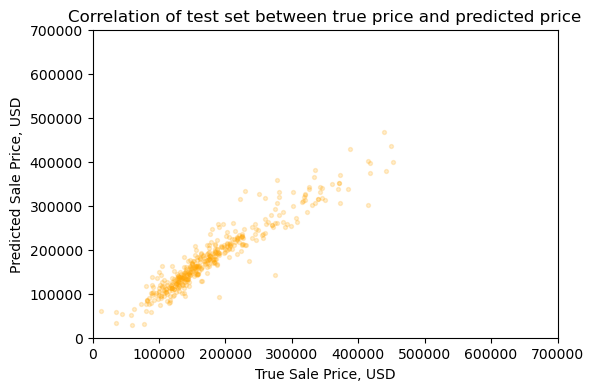

In [69]:
plt.figure(figsize = (6, 4))
tr_price = y_test
predicted_price = y_hat_ztest
plt.scatter(tr_price, predicted_price, color = 'orange', s= 8, alpha = 1/5)
plt.xlabel('True Sale Price, USD')
plt.ylabel('Predicted Sale Price, USD')
plt.xlim(0, 700000)
plt.ylim(0, 700000)
plt.title('Correlation of test set between true price and predicted price');

In [70]:
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.9087297317333363
0.899215101712248


In [71]:
lasso_cv.coef_

array([-2.08312684e+03,  4.72935022e+03, -4.55284162e+03, -1.94053691e+03,
        2.59140937e+03,  9.86234907e+03,  4.72427324e+03,  4.75633329e+03,
        1.47840309e+03,  2.72718464e+03,  2.22147613e+03,  1.26023906e+03,
        2.42845832e+02,  1.07898091e+03,  1.31341230e+04,  1.40881061e+04,
        1.10954184e+03,  3.46113797e+03,  3.69896566e+03, -6.92822787e+01,
        4.64465486e+03,  2.62573134e+03, -7.77110919e+02, -2.53166676e+03,
        2.86542963e+03,  3.32293041e+03, -8.32478087e+02,  4.18852762e+03,
        1.59368930e+03,  1.08649413e+03, -3.55404227e+02,  9.96659304e+02,
        1.48160798e+03,  4.44567819e+03, -2.89116583e+03, -5.63492138e+03,
       -3.88450161e+02, -2.10543287e+03,  5.11237919e+03,  0.00000000e+00,
        2.47440305e+03,  7.66318006e+03,  5.32984581e+03,  6.30125724e+02,
        1.10238368e+03, -3.14370929e+03, -2.23066865e+02,  4.66299009e+03,
        1.33808757e+03,  4.47673004e+03,  0.00000000e+00,  1.13023801e+03,
       -1.11040494e+03, -

In [72]:
s = pd.Series(lasso_cv.coef_,index = X.columns)

In [73]:
# lasso_coefs = s.to_frame()

In [74]:
lasso_coefs = pd.DataFrame(s, columns = ['lasso_cv_coefs'])

In [75]:
lasso_coefs = lasso_coefs.sort_values(by= 'lasso_cv_coefs', ascending=True)

In [76]:
lasso_coefs.head(5)

,lasso_cv_coefs
Exter Qual_TA,-17419.198199
Exter Qual_Gd,-14742.213275
Kitchen Qual_TA,-11701.997244
Neighborhood_Edwards,-10785.332508
Kitchen Qual_Gd,-9873.515293


In [77]:
feature_select = lasso_coefs[(lasso_coefs["lasso_cv_coefs"] > 2500) | (lasso_coefs["lasso_cv_coefs"] < -2500)]
feature_select.index

Index(['Exter Qual_TA', 'Exter Qual_Gd', 'Kitchen Qual_TA',
       'Neighborhood_Edwards', 'Kitchen Qual_Gd', 'Neighborhood_NAmes',
       'Neighborhood_OldTown', 'Bsmt Qual_Gd', 'Neighborhood_Sawyer',
       'Bsmt Qual_TA', 'Neighborhood_CollgCr', 'Bldg Type_TwnhsE',
       'Neighborhood_IDOTRR', 'Misc Val', 'Neighborhood_Gilbert',
       'Neighborhood_Mitchel', 'Neighborhood_BrkSide', 'Neighborhood_SawyerW',
       'Neighborhood_NWAmes', 'MS SubClass', 'Bldg Type_Twnhs',
       'Exter Qual_Fa', 'Neighborhood_SWISU', 'Kitchen Qual_Fa',
       'Neighborhood_Timber', 'Lot Shape_IR3', 'Pool Area',
       'Neighborhood_ClearCr', 'Bsmt Exposure_No', 'BsmtFin Type 1_Unf',
       'BsmtFin Type 2_Rec', 'BsmtFin Type 2_Unf', 'Kitchen AbvGr',
       'Functional_Min2', 'Lot Area', 'Half Bath', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Garage Type_BuiltIn', 'Functional_Min1', 'Fireplaces',
       'Gr Liv Area', 'Roof Matl_WdShngl', 'Bsmt Exposure_Gd',
       'Neighborhood_NoRidge', 'Bsmt Full Bath

In [93]:
feature_select.loc['Lot Area']

lasso_cv_coefs    2591.409372
Name: Lot Area, dtype: float64

In [78]:
lasso_coefs

,lasso_cv_coefs
Exter Qual_TA,-17419.198199
Exter Qual_Gd,-14742.213275
Kitchen Qual_TA,-11701.997244
Neighborhood_Edwards,-10785.332508
Kitchen Qual_Gd,-9873.515293
...,...
Roof Style_Hip,6903.451724
MS Zoning_RL,7663.180057
Overall Qual,9862.349068
1st Flr SF,13134.122982


<Figure size 1200x800 with 0 Axes>

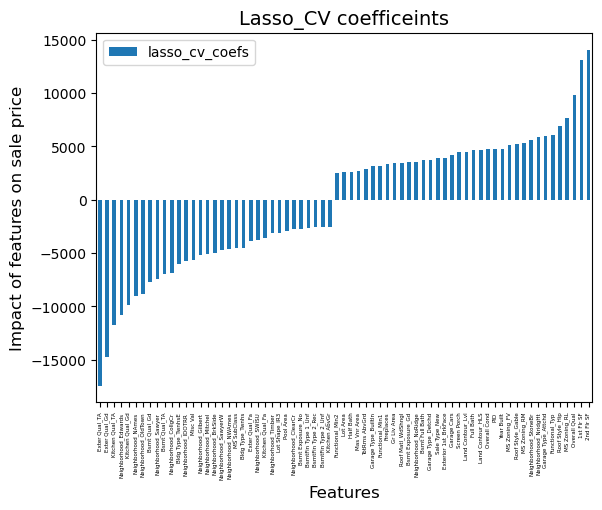

In [79]:
plt.figure(figsize = (12, 8))
feature_select.plot(kind = 'bar')
plt.tick_params(axis='x', labelsize = 4)
plt.tick_params(axis='y', labelsize = 10)
plt.title('Lasso_CV coefficeints', fontsize = 14)
plt.xlabel('Features', fontsize = 12)
plt.legend( fontsize = 10)
plt.ylabel('Impact of features on sale price', fontsize = 12);

##### I will continue to work on the outcome of Lasso model. 
##### I am curious to know sale prices houses in test data after removing the independent variables that have zero impact as per Lasso model. 

In [80]:
test_dums = pd.read_csv('./datasets/test_cleaned_02182024AAA.csv')

In [81]:
ames_sec = pd.read_csv('./datasets/ames_clean_data_before_dropna.csv')

In [82]:
ames_sec.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [83]:
# ames_sec_drop = ames_sec.drop(columns = ['Id', 'PID', 'MS SubClass'])

In [84]:
# ames_sec_drop.head()

In [85]:
Xls =  ames_sec[feature_select.index]
Xls.shape

(2051, 69)

In [86]:
yls = ames_sec['SalePrice']
yls.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [87]:
A_train, A_test, b_train, b_test = train_test_split(Xls, yls,
                    test_size = 0.2, random_state = 2024)

In [88]:
sc = StandardScaler()
Zl_train = sc.fit_transform(A_train)
Zl_test = sc.transform(A_test)

In [89]:
print(f'Zl_train shape is: {Zl_train.shape}')
print(f'b_train shape is: {b_train.shape}')
print(f'Zl_test shape is: {Zl_test.shape}')
print(f'b_test shape is: {b_test.shape}')

Zl_train shape is: (1640, 69)
b_train shape is: (1640,)
Zl_test shape is: (411, 69)
b_test shape is: (411,)


# Zl_train linear regression

In [90]:
from sklearn.exceptions import NotFittedError
lrs = LinearRegression()

In [91]:
b_hat_train = lrs.predict(Zl_train)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.